In [3]:
import pandas as pd
import numpy as np
from sklearn import metrics

data=pd.read_csv('../../data/train.csv',index_col='id')
data_2=pd.read_csv('../../data/train.csv',index_col='id')

In [ ]:
#Look for Missing values
data.isnull().sum()

In [4]:
print("Data Dimensions:"+str(data.shape))
data.head()

Data Dimensions:(188318, 131)


,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
id,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,B,A,A,A,A,B,A,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
2,A,B,A,A,A,A,A,A,B,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
5,A,B,A,A,B,A,A,A,B,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
10,B,B,A,B,A,A,A,A,B,A,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
11,A,B,A,B,A,A,A,A,B,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [5]:
# Store Index of All columns in the dataset
cols=data.columns

In [6]:
X=data[cols[0:-1]]
print(X.shape)
X.head()

(188318, 130)


,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
id,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,B,A,A,A,A,B,A,...,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
2,A,B,A,A,A,A,A,A,B,B,...,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
5,A,B,A,A,B,A,A,A,B,B,...,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
10,B,B,A,B,A,A,A,A,B,A,...,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
11,A,B,A,B,A,A,A,A,B,B,...,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606


In [7]:
y=data[[cols[-1]]]
y.head()

,loss
id,
1,2213.18
2,1283.60
5,3005.09
10,939.85
11,2763.85


In [8]:
data.describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [9]:
contFeatureslist = []
for colName,x in data.iloc[0,:].iteritems():
    if(not str(x).isalpha()):
        contFeatureslist.append(colName)

In [10]:
print(contFeatureslist )

['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'loss']


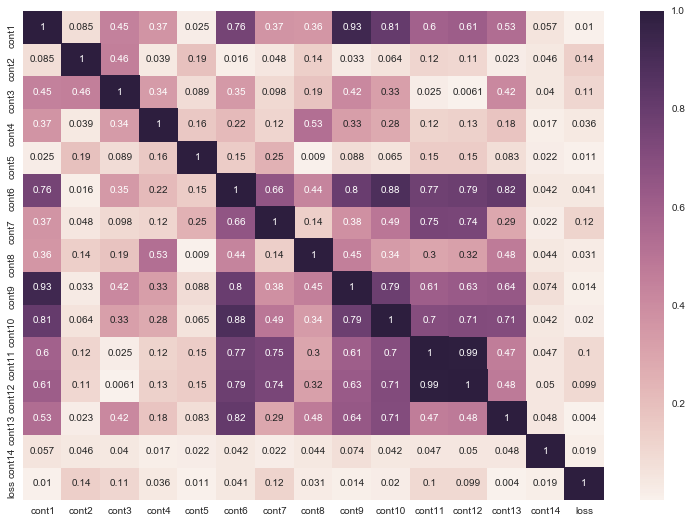

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

correlationMatrix = data[contFeatureslist].corr().abs()

plt.subplots(figsize=(13, 9))
sns.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sns.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar=False)
plt.show()


C:\ANACONDA\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


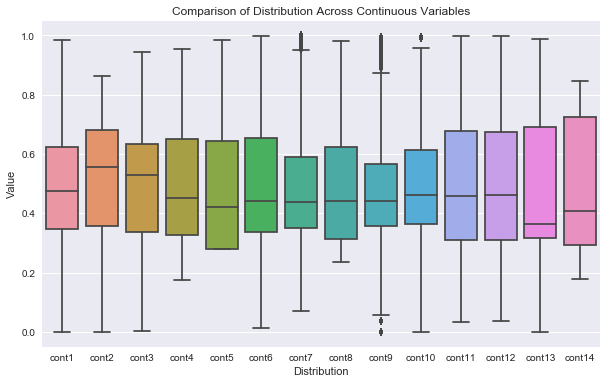

In [14]:
# Create a figure instance
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title('Comparison of Distribution Across Continuous Variables')
ax1.set_xlabel('Distribution')
ax1.set_ylabel('Value')

sns.boxplot(data[contFeatureslist[0:14]])

In [15]:
# Print Categircal variable
for i in range(0,116):
    print(X[cols[i]].unique())

['A' 'B']
['B' 'A']
['A' 'B']
['B' 'A']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['B' 'A']
['A' 'B']
['B' 'A']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['B' 'A']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['A' 'B' 'C']
['A' 'B' 'C']
['B' 'A' 'C']
['A' 'C' 'B']
['D' 'C' 'B' 'A']
['B' 'A' 'C' 'D']
['B' 'D' 'A' 'C']
['D' 'B' 'A' 'C']
['D' 'B' 'A' 'C']
['B' 'A' 'D' 'C']
['D' 'B' 'A' 'C']
['C' 'A' 'D' 'B']
['B' 'A' 'C' 'D']
['D' 'B' 'C' 'A']
['B' 'C' 'D' 'A']
['A' 'D' 'E' 'B']
['A' 'B'

In [16]:
#Create a list of unique labels
#List contains arrays of all unque lables in each categorcial variable. 
#Each cateogical var is stored as an raary
labels=[]
n=116 #no.of categorical varibales
for i in range(0,116): 
    header=X[cols[i]].unique()
    # append functions appends outocme of all unique categorical 
    #variables in list
    labels.append(header) 
labels

[array(['A', 'B'], dtype=object),
 array(['B', 'A'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['B', 'A'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['B', 'A'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['B', 'A'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['B', 'A'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', '

In [ ]:
#Import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [ ]:
cat=[] # Create a list of Encoded variables
for i in range(0, n):
    #Label encode
    label_encoder = LabelEncoder()
    label_encoder.fit(labels[i]) # Encode each element in array
    # An array of feature variable transforming each data point
    feature = label_encoder.transform(X.iloc[:,i]) 
    #Re-shape array to look similar as data
    feature = feature.reshape(X.shape[0], 1)
    #One hot encode
    onehot_encoder = OneHotEncoder(sparse=False,n_values=len(labels[i]))
    feature = onehot_encoder.fit_transform(feature)
    cat.append(feature)

In [ ]:
import numpy as np
encoded_cat = np.column_stack(cat)

In [ ]:
print(encoded_cat.shape)

In [ ]:
#Concatentating Data
X_enc= np.concatenate((encoded_cat,X.iloc[:,116:].values),axis=1)

In [ ]:
# split into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, random_state=1)

In [ ]:

########## Ridge Regression Model ##########
# ridge regression (alpha must be positive, larger means more regularization)
from sklearn.linear_model import Ridge
rreg = Ridge(alpha=1, normalize=True)
rreg.fit(X_train, y_train)
rreg.coef_
preds = rreg.predict(X_test)
print('RMSE (Ridge reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))
# Is this model better? Why?v


In [ ]:

# use RidgeCV to select best alpha
from sklearn.linear_model import RidgeCV
alpha_range = 10.**np.arange(-1, 1)
rregcv = RidgeCV(normalize=True, scoring='neg_mean_squared_error', alphas=alpha_range)
rregcv.fit(X_train, y_train)

# Print the optimal value of Alpha for Ridge Regression
print('Optimal Alpha Value: ', rregcv.alpha_)

# Print the RMSE for the ridge regression model
preds = rregcv.predict(X_test)
print ('RMSE (Ridge CV reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))


In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

In [ ]:
preds = regressor.predict(X_test)
print('RMSE (no regularization) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))

In [ ]:
# use LassoCV to select best alpha (tries 100 alphas by default)
from sklearn.linear_model import LassoCV
alpha_range=10.**np.arange(-2,2)
lascv = LassoCV(normalize=True, alphas=alpha_range)
lascv.fit(X_train, y_train)
print('Optimal Alpha Value: ',lascv.alpha_)
lascv.coef_
preds = lascv.predict(X_test)
print('RMSE (Lasso CV reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))

In [ ]:
# Variable encoded as numbersa due to complexity

catFeatureslist = []
for colName,x in data.iloc[0,:].iteritems():
    if(str(x).isalpha()):
        catFeatureslist.append(colName)
        
for cf1 in catFeatureslist:
    le = LabelEncoder()
    le.fit(data_2[cf1].unique())
    data_2[cf1] = le.transform(data_2[cf1])

In [ ]:
data.head()

In [ ]:
#Reading X again
X_1=data_2.iloc[:,0:-1]

# split into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y, random_state=1)
from sklearn import tree 
rtree = tree.DecisionTreeRegressor()

rtree.fit(X_train, y_train)
predictions=rtree.predict(X_test)

In [ ]:
predictions=pd.DataFrame(predictions)
predictions.head(100)

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores = cross_val_score(rtree, X_1, y, cv=2, scoring='mean_squared_error')
mse_scores = -scores
mse_scores
rmse_scores = np.sqrt(mse_scores)

In [ ]:
rmse_scores
print(rmse_scores.mean())

In [ ]:
loss_mean = y.mean()
loss_mean

In [ ]:
features = X.columns
df=pd.DataFrame({'feature':X.columns, 'importance':rtree.feature_importances_})
df.sort_index(axis=0,ascending=False)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfreg=RandomForestRegressor(n_estimators=10, criterion='mse', oob_score=True) 
rfreg.fit(X_train,y_train)

In [ ]:
rfreg.oob_score_

In [ ]:
rfreg.feature_importances_
# compute the feature importances
df=pd.DataFrame({'feature':X.columns, 'importance':rfreg.feature_importances_}).sort_index(axis=0,ascending=False)
df.max()

In [ ]:
import numpy as np
n_rows=data.shape[0]
# set a seed for reproducibility
np.random.seed(123)

# create three bootstrap samples (will be used to select rows from the DataFrame)
sample1 = np.random.choice(a=n_rows, size=n_rows, replace=True)
sample2 = np.random.choice(a=n_rows, size=n_rows, replace=True)
sample3 = np.random.choice(a=n_rows, size=n_rows, replace=True)
print(sample1)
data.iloc[sample1, -1]

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# grow one regression tree with each bootstrapped training set
treereg1 = DecisionTreeRegressor(random_state=123)
treereg1.fit(df_X.iloc[sample1, 1:-1], data.iloc[sample1, -1])

#treereg2 = DecisionTreeRegressor(random_state=123)
#treereg2.fit(df_X.iloc[sample2, 1:-1], data.iloc[sample2, -1])

#treereg3 = DecisionTreeRegressor(random_state=123)
#treereg3.fit(df_X.iloc[sample3, 1:-1], data.iloc[sample3, -1])

In [ ]:
X.columns